<a href="https://colab.research.google.com/github/nedokormysh/GB_intro_Molecular_Biology_Genetic/blob/lesson2/GB_molecular_Biology_Genetics_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Урок 2. От гена до белка
В таблицу гена, полученную по итогам практического задания первого урока, добавьте следующую информацию: аминокислотную последовательность, количество транскриптов, количество аминокислот для самой длинной изоформы белка.

Сделанное практическое задание предоставляется в формате .ipynb.

https://colab.research.google.com/drive/1YF3b8bJ-3-Wjso2KOtvmj-QB2UhEZNJQ

In [158]:
!pip install biopython -q

In [159]:
import pandas as pd
from Bio import Entrez
from Bio import SeqIO
from Bio.Seq import MutableSeq
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

Загрузим таблицу для всех генов, которую получили в прошлом задании.

In [160]:
df = pd.read_csv('https://raw.githubusercontent.com/nedokormysh/GB_intro_Molecular_Biology_Genetic/lesson1/gene_info.csv')
df.head()

,geneId,geneSymbol,start,end,gi_id,strand,chrom_num,mapLoc,ID chromosome,gene lenght,gene
0,790,CAD,27217369,27243943,568815596,plus,2,2p23.3,NC_000002.12,26574,GTCTCTGCTGCTGCCGCCAAGCGCGCCCGAGGCTCCTACGCTGCCG...
1,1723,DHODH,72008744,72027659,568815582,plus,16,16q22.2,NC_000016.10,18915,GGCTTAATGACGGAAGGAGCATGGCGTGGAGACACCTGAAAGTGAG...
2,2056,EPO,100720468,100723700,568815591,plus,7,7q22.1,NC_000007.14,3232,CTTTCCCAGATAGCACGCTCCGCCAGTCCCAAGGGTGCGCAACCGG...
3,3040,HBA2,172876,173710,568815582,plus,16,16p13.3,NC_000016.10,834,CTCTTCTGGTCCCCACAGACTCAGAGAGAACCCACCATGGTGCTGT...
4,3043,HBB,5225464,5227071,568815587,minus,11,11p15.4,NC_000011.10,1607,TGCAATGAAAATAAATGTTTTTTATTAGGCAGAATCCAGATGCTCA...


Требуется работать только с одним геном. Оставим одну запись в таблице.

In [161]:
df = df.iloc[[0]]
df.T

,0
geneId,790
geneSymbol,CAD
start,27217369
end,27243943
gi_id,568815596
strand,plus
chrom_num,2
mapLoc,2p23.3
ID chromosome,NC_000002.12
gene lenght,26574


In [162]:
seq_gene = Seq(df['gene'][0])
seq_gene

Seq('GTCTCTGCTGCTGCCGCCAAGCGCGCCCGAGGCTCCTACGCTGCCGCGCCCGGC...TAA')

Это последовательность на смысловой цепи ДНК. Необходимо посмотреть её на матричной цепи. Для этого нам нужна комплиментраная последовательность. Также необходимо учитывать направление цепи ДНК. В данном случае, оно положительное, но создадим функцию проверки на направление.

In [163]:
def wright_way_compliment(seq_gene, strand):
  
  return seq_gene.complement() if strand == 'plus' else seq_gene.reverse_complement().complement()   

In [164]:
seq_gene_compl = wright_way_compliment(seq_gene, df['strand'][0])
seq_gene_compl

Seq('CAGAGACGACGACGGCGGTTCGCGCGGGCTCCGAGGATGCGACGGCGCGGGCCG...ATT')

Теперь можем произвести транскрибцию, т.е. переведём последовательность ДНК в РНК.

In [165]:
m_rna = seq_gene_compl.transcribe()
m_rna

Seq('CAGAGACGACGACGGCGGUUCGCGCGGGCUCCGAGGAUGCGACGGCGCGGGCCG...AUU')

Теперь произведем трансляцию РНК в белок. Требуется найти первой вхождение 'AUG' в последовательность.

In [166]:
start_codon_index = str(m_rna).find('AUG')
protein_seq_ = m_rna[start_codon_index:]
protein_seq_

Seq('AUGCGACGGCGCGGGCCGAAGAGAGGUCGCGGGGCGCGGCAAUCGGUGCACCUG...AUU')

In [167]:
len(protein_seq_)

26538

In [168]:
protein = protein_seq_.translate()
protein

Seq('MRRRGPKRGRGARQSVHLAEAARQECTKVTSNVRKGEEA*AGAETRGKGTAGIT...RTI')

In [169]:
len(protein)

8846

In [170]:
# Добавим последовательность белка в таблицу
df['prot.seq.example'] = str(protein)

In [171]:
df.T

,0
geneId,790
geneSymbol,CAD
start,27217369
end,27243943
gi_id,568815596
strand,plus
chrom_num,2
mapLoc,2p23.3
ID chromosome,NC_000002.12
gene lenght,26574


Необходимо найти количество транскриптов. На сайте имеем 6 транскриптов.

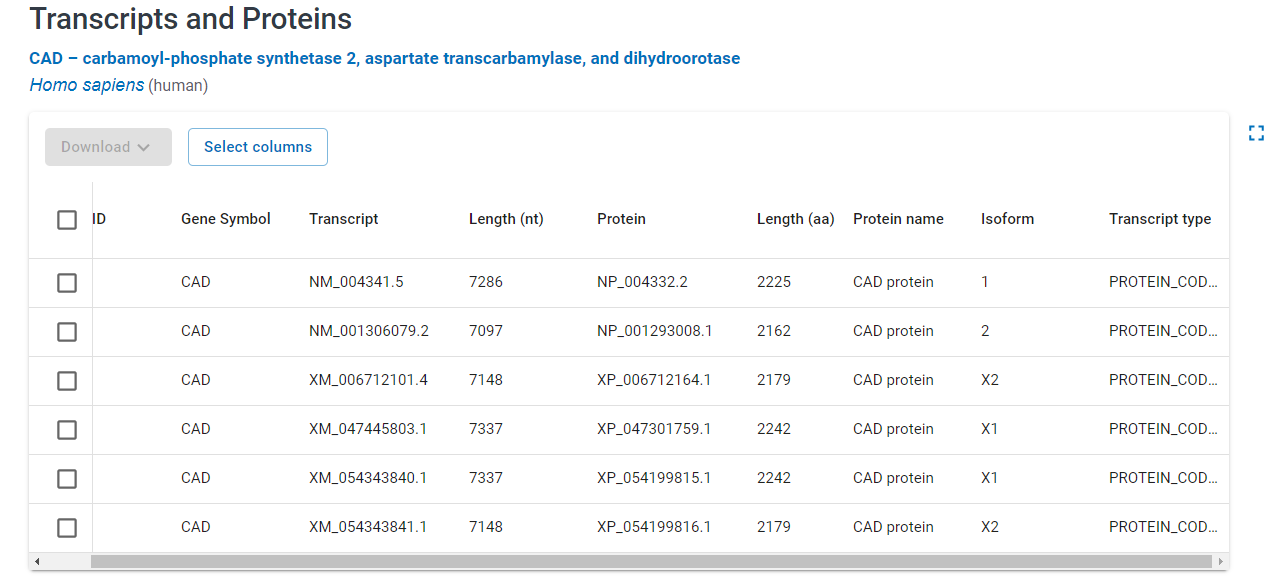

Но поиск по разделу nucleotide и nuccore выдаёт ещё 5 лишних последовательности.

In [186]:
handle = Entrez.esearch(db="nucleotide", term='CAD[Gene Name] AND "790"[entrezID] AND "human"[Organism] AND RefSeq[Keyword]', idtype="acc")
record = Entrez.read(handle)
handle.close()
record['IdList'], len(record['IdList'])

(['XM_054343841.1', 'XM_054343840.1', 'XM_006712101.4', 'XM_047445803.1', 'NC_060925.1', 'NC_060926.1', 'NC_000001.11', 'NC_000002.12', 'NM_001306079.2', 'NM_004341.5', 'NG_046394.1'],
 11)

Поиск по протеинам выдаёт 6 нужных нам комбинаций.

In [173]:
# Получаем список белков по имени гена из базы `protein` 
handle = Entrez.esearch(db="protein", term='CAD[Gene Name] AND "790"[entrezID] AND "human"[Organism] AND RefSeq[Keyword]', idtype="acc"
                        )
record = Entrez.read(handle)
handle.close()
record

{'Count': '6', 'RetMax': '6', 'RetStart': '0', 'IdList': ['XP_054199816.1', 'XP_054199815.1', 'XP_047301759.1', 'XP_006712164.1', 'NP_001293008.1', 'NP_004332.2'], 'TranslationSet': [], 'TranslationStack': [{'Term': 'CAD[Gene Name]', 'Field': 'Gene Name', 'Count': '31264', 'Explode': 'N'}, {'Term': '"790"[All Fields]', 'Field': 'All Fields', 'Count': '1535958', 'Explode': 'N'}, 'AND', {'Term': '"human"[Organism]', 'Field': 'Organism', 'Count': '1899197', 'Explode': 'Y'}, 'AND', {'Term': 'RefSeq[Keyword]', 'Field': 'Keyword', 'Count': '262603938', 'Explode': 'N'}, 'AND'], 'QueryTranslation': 'CAD[Gene Name] AND "790"[All Fields] AND "human"[Organism] AND RefSeq[Keyword]', 'ErrorList': {'PhraseNotFound': [], 'FieldNotFound': ['entrezID']}}

In [174]:
len(record['IdList'])

6

In [175]:
handle = Entrez.efetch(db="protein",
                           id=2462577006,
                           rettype = 'gb',
                           retmode = 'text')
info = SeqIO.read(handle, 'gb')
info

SeqRecord(seq=Seq('MAALVLEDGSVLRGQPFGAAVSTAGEVVFQTGMVGYPEALTDPSYKAQILVLTY...GRF'), id='XP_054199816.1', name='XP_054199816', description='CAD protein isoform X2 [Homo sapiens]', dbxrefs=['BioProject:PRJNA807723'])

Оставим только белки с accession number, начинающиеся на NP_ (или можно было бы взять NM_ )

In [176]:
stri = 'NP_001293008.1'
'NP' in stri

True

In [177]:
transcriptions_list = [el for el in record['IdList'] if 'NP' in el]
transcriptions_list

['NP_001293008.1', 'NP_004332.2']

In [178]:
df['num_of_transcripts'] = len(transcriptions_list)

Выгрузим последовательности наших белков и найдём белок максимальной длины

In [179]:
def max_length_protein(transcriptions_list):
  max = 0
  for el in transcriptions_list:
    
    handle = Entrez.efetch(db="protein",
                           id=el,
                           rettype = 'gb',
                           retmode = 'text')
    protein = SeqIO.read(handle, 'gb')
    if len(protein.seq) > max:
      max_prot_id, max_prot_seq = protein.id, protein.seq

  return protein.id, protein.seq

In [185]:
max_length_protein(transcriptions_list)

('NP_004332.2',
 Seq('MAALVLEDGSVLRGQPFGAAVSTAGEVVFQTGMVGYPEALTDPSYKAQILVLTY...GRF'))

In [181]:
df['gr_acid_num'] = len(max_length_protein(transcriptions_list)[1])

In [182]:
df.T

,0
geneId,790
geneSymbol,CAD
start,27217369
end,27243943
gi_id,568815596
strand,plus
chrom_num,2
mapLoc,2p23.3
ID chromosome,NC_000002.12
gene lenght,26574


In [183]:
df.to_csv('df_task_2.csv')